In [1]:
%matplotlib inline

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
map_GJ= gpd.GeoDataFrame.from_file('./LSMD_CONT_LDREG_서울_광진구/LSMD_CONT_LDREG_11215.shp', encoding='cp949')
map_GJ.head()

,sgg_oid,jibun,bchk,pnu,col_adm_se,geometry
0,201793,18-54 공,1,1121510200100180054,11215,"POLYGON ((207056.900 550304.134, 207056.161 55..."
1,83707,135-19도,1,1121510200101350019,11215,"POLYGON ((207250.092 550332.795, 207255.628 55..."
2,83772,135-35대,1,1121510200101350035,11215,"POLYGON ((207267.052 550312.245, 207272.349 55..."
3,83473,143대,1,1121510200101430000,11215,"POLYGON ((207122.576 550390.448, 207132.447 55..."
4,92539,553-59도,1,1121510500105530059,11215,"POLYGON ((205770.324 548585.328, 205772.210 54..."


In [3]:
print(map_GJ.crs)

None


In [4]:
map_GJ.set_crs(epsg=5186, inplace=True)
map_GJ = map_GJ.to_crs(epsg=4326)
map_GJ = map_GJ.to_crs({'init':'epsg:4326'})

C:\Users\bbcc6\AppData\Local\Programs\Python\Python310\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [5]:
map_GJ['sgg_oid'].unique()

array([201793,  83707,  83772, ...,  94140,  94141, 232881], dtype=int64)

In [6]:
map_GJ['jibun'].unique()

array(['18-54 공', '135-19도', '135-35대', ..., '721-1도', '721도', '680-1 도'],
      dtype=object)

In [7]:
map_GJ['bchk'].unique()

array(['1', '9', '8', '0', '3'], dtype=object)

In [8]:
map_GJ['pnu'].unique()

array(['1121510200100180054', '1121510200101350019',
       '1121510200101350035', ..., '1121510500107210001',
       '1121510500107210000', '1121510300106800001'], dtype=object)

In [9]:
map_GJ['col_adm_se'].unique()

array(['11215'], dtype=object)

In [10]:
map_GJ['geometry'].unique()

<GeometryArray>
[<POLYGON ((127.08 37.552, 127.08 37.552, 127.08 37.552, 127.08 37.552, 127.0...>,
 <POLYGON ((127.082 37.552, 127.082 37.552, 127.082 37.552, 127.082 37.552, 1...>,
 <POLYGON ((127.082 37.552, 127.082 37.552, 127.082 37.552, 127.082 37.552, 1...>,
 <POLYGON ((127.081 37.553, 127.081 37.553, 127.081 37.553, 127.081 37.553, 1...>,
 <POLYGON ((127.065 37.537, 127.065 37.537, 127.065 37.537, 127.065 37.537, 1...>,
 <POLYGON ((127.079 37.558, 127.079 37.558, 127.079 37.558, 127.079 37.558, 1...>,
 <POLYGON ((127.085 37.548, 127.086 37.548, 127.086 37.548, 127.086 37.548, 1...>,
 <POLYGON ((127.087 37.549, 127.087 37.549, 127.087 37.549, 127.087 37.549, 1...>,
 <POLYGON ((127.088 37.549, 127.088 37.549, 127.088 37.549, 127.088 37.549, 1...>,
 <POLYGON ((127.087 37.549, 127.087 37.549, 127.087 37.549, 127.087 37.549, 1...>,
 ...
 <POLYGON ((127.083 37.535, 127.083 37.535, 127.084 37.535, 127.084 37.534, 1...>,
 <POLYGON ((127.064 37.534, 127.064 37.534, 127.064 37.534, 127.06

<Axes: >

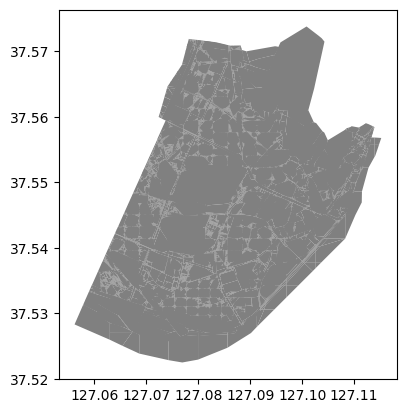

In [11]:
map_GJ.convex_hull.plot(color='gray')

In [12]:
#넓이
map_GJ.geometry.area.head()  

C:\Users\bbcc6\AppData\Local\Temp\ipykernel_34492\2194975933.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  map_GJ.geometry.area.head()


0    9.436958e-09
1    1.576060e-09
2    8.276792e-09
3    2.549337e-08
4    2.170979e-08
dtype: float64

In [13]:
#테두리 길이
map_GJ.geometry.length.head()

C:\Users\bbcc6\AppData\Local\Temp\ipykernel_34492\1146559104.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  map_GJ.geometry.length.head()


0    0.000955
1    0.000305
2    0.000413
3    0.000637
4    0.002056
dtype: float64

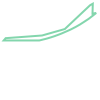

In [14]:
#경계선
map_GJ.geometry[0].boundary

In [15]:
#중심점
map_GJ.geometry.centroid.head()

C:\Users\bbcc6\AppData\Local\Temp\ipykernel_34492\633459616.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  map_GJ.geometry.centroid.head()


0    POINT (127.07970 37.55217)
1    POINT (127.08211 37.55242)
2    POINT (127.08233 37.55229)
3    POINT (127.08059 37.55292)
4    POINT (127.06543 37.53660)
dtype: geometry

In [16]:
#도형이 유효한지
map_GJ.geometry.is_valid.head()

0    True
1    True
2    True
3    True
4    True
dtype: bool

In [17]:
map_GJ.geometry.is_valid.unique()

array([ True, False])

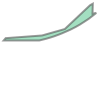

In [18]:
map_GJ.geometry[0]

In [19]:
print(map_GJ.geometry[0])

POLYGON ((127.07986186792067 37.55223120980644, 127.0798534979887 37.5522246651574, 127.0798280031778 37.552204788194544, 127.07982208045813 37.552200908852555, 127.07978886588485 37.552179352147554, 127.07976921970787 37.55216823793385, 127.07974657407411 37.552156621149216, 127.07973633902706 37.55215211396617, 127.07970856635794 37.552139959975804, 127.07969858080115 37.55213594816916, 127.0796756442177 37.552127458000975, 127.07965817654578 37.55212176629039, 127.07963775491834 37.55211579722437, 127.07960832370152 37.55210841955791, 127.07944917629099 37.55210829043824, 127.07945804804177 37.552118609935626, 127.07962007085715 37.55213047704958, 127.07972146494649 37.552159232633784, 127.07983391712443 37.55226517767359, 127.07984629367108 37.55227217917158, 127.07984497980647 37.55222785130479, 127.07986186792067 37.55223120980644))


In [20]:
print(map_GJ.geometry.is_valid[map_GJ.geometry.is_valid == False])

51       False
9422     False
10303    False
15355    False
30475    False
dtype: bool


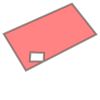

In [21]:
map_GJ.geometry[51]

In [22]:
invalid_area = map_GJ.geometry[51]
print(invalid_area.is_valid)
print(invalid_area.buffer(0).is_valid) # buffer로 보정
map_GJ.geometry[51] = map_GJ.geometry[51].buffer(0)

False
True


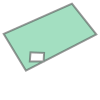

In [23]:
map_GJ.geometry[51]

In [24]:
map_GJ.geometry[9422] = map_GJ.geometry[51].buffer(0)
map_GJ.geometry[10303] = map_GJ.geometry[51].buffer(0)
map_GJ.geometry[15355] = map_GJ.geometry[51].buffer(0)
map_GJ.geometry[30475] = map_GJ.geometry[51].buffer(0)

In [25]:
print(map_GJ.geometry.is_valid[map_GJ.geometry.is_valid == False])

Series([], dtype: bool)


In [26]:
map_GJ.geometry.is_valid.unique()

array([ True])

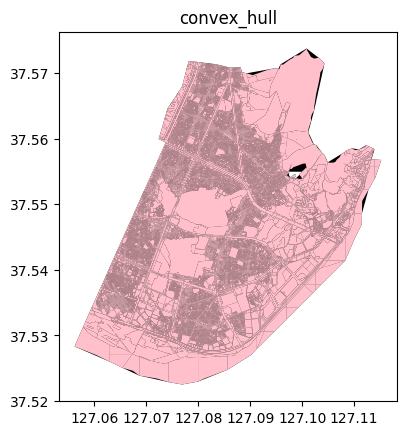

In [27]:
GJ = map_GJ
ax = GJ.convex_hull.plot(color='black')
GJ.plot(figsize=(5,5), ax=ax, color='pink')
plt.title("convex_hull")
plt.show()